In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'population.raw.csv'
data = pd.read_csv(file_path, index_col=0)

In [3]:
data = data.sort_values(by=data.columns[-1], ascending=False)

In [4]:
years = data.columns.astype(int)
y_min = data.min().min()
y_max = data.max().max()

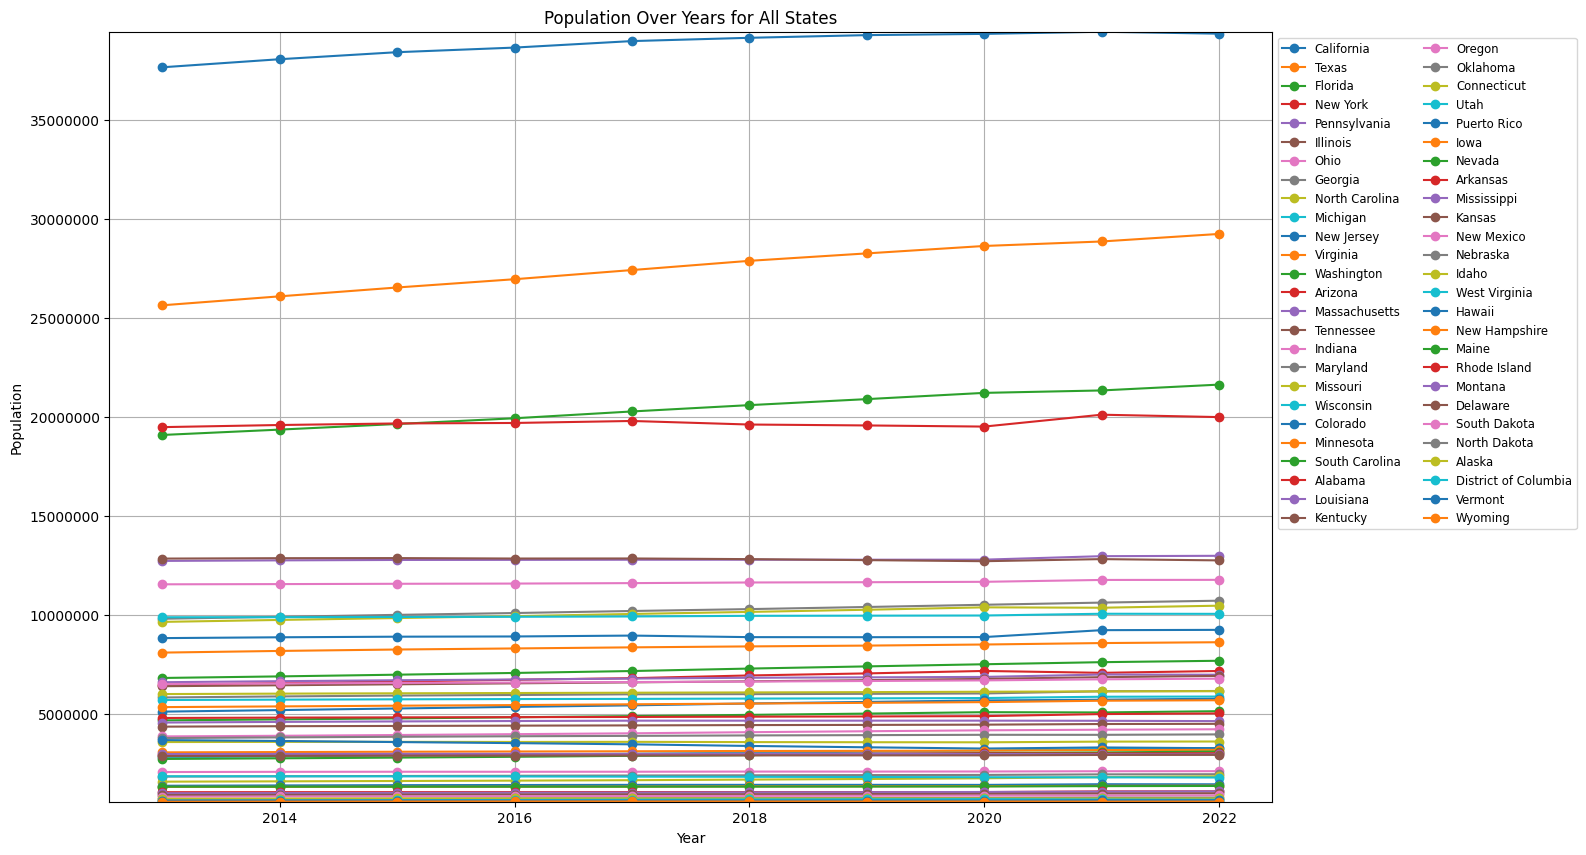

In [5]:
plt.figure(figsize=(15, 10))

# Show trends for all states
for state in data.index:
    population = data.loc[state]
    plt.plot(years, population, marker='o', label=state)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize='small')
plt.ylim(y_min, y_max)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Population Over Years for All States')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)

In [6]:
plt.show()

In [7]:
last_column = data.iloc[:, -1]

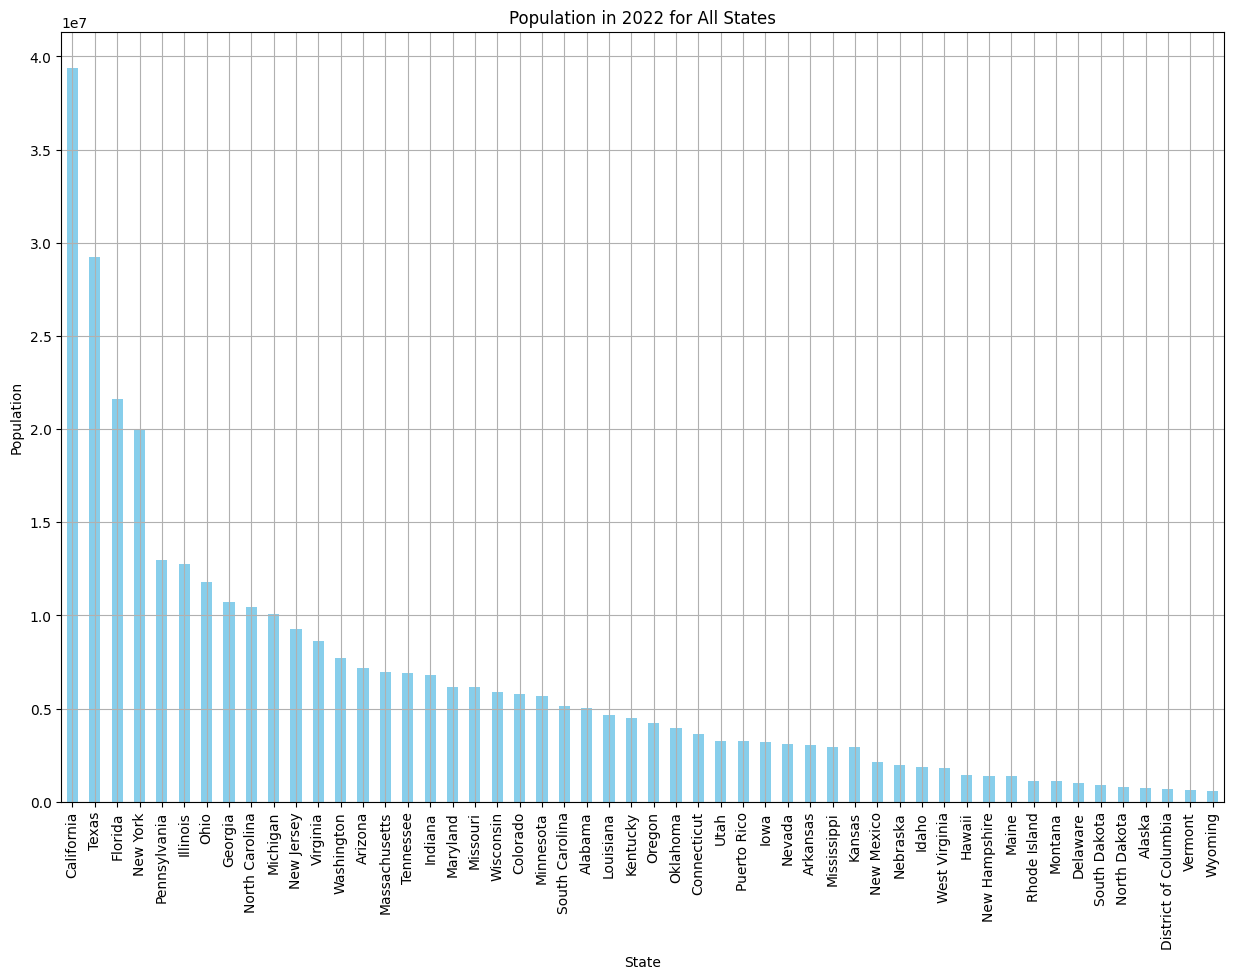

In [8]:
plt.figure(figsize=(15, 10))
last_column.plot(kind='bar', color='skyblue')
plt.title('Population in 2022 for All States')
plt.xlabel('State')
plt.ylabel('Population')
plt.grid(True)

In [9]:
plt.show()

In [27]:
pop_2013_sorted = data['2013'].sort_values(ascending=False)
pop_2022_sorted = data['2022'].sort_values(ascending=False)
order_2013 = pop_2013_sorted.index.tolist()
order_2022 = pop_2022_sorted.index.tolist()
changed_states = [state for state in order_2013 if order_2013.index(state) != order_2022.index(state)]

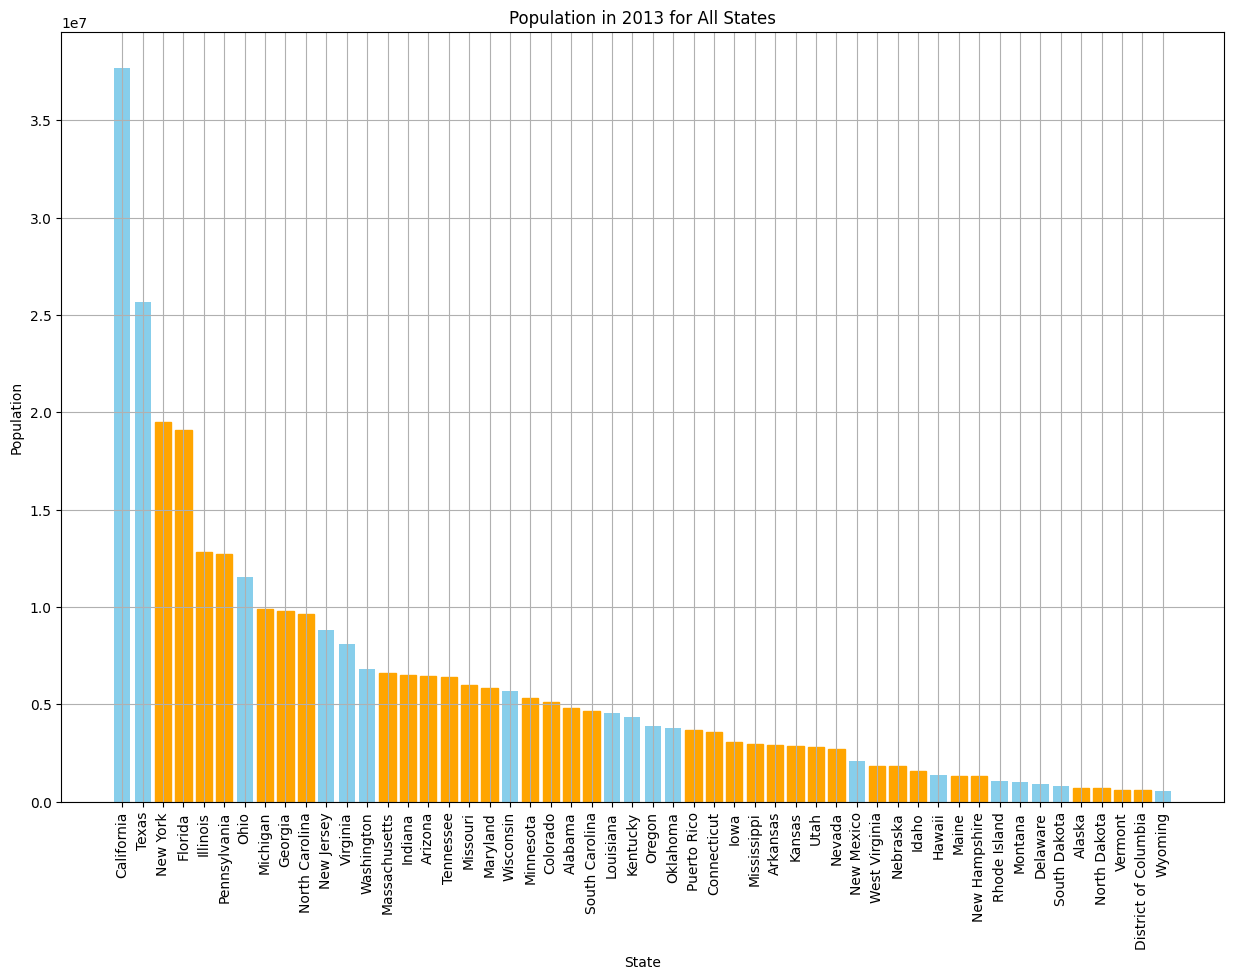

In [29]:
plt.figure(figsize=(15, 10))
bars = plt.bar(pop_2013_sorted.index, pop_2013_sorted, color='skyblue')
plt.title('Population in 2013 for All States')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(True)

# Highlight states whose order changed
for bar, state in zip(bars, pop_2013_sorted.index):
    if state in changed_states:
        bar.set_color('orange')

In [26]:
plt.show()

In [16]:
percentage_change = ((data['2022'] - data['2013']) / data['2013']) * 100
percentage_change_sorted = percentage_change.sort_values(ascending=False)

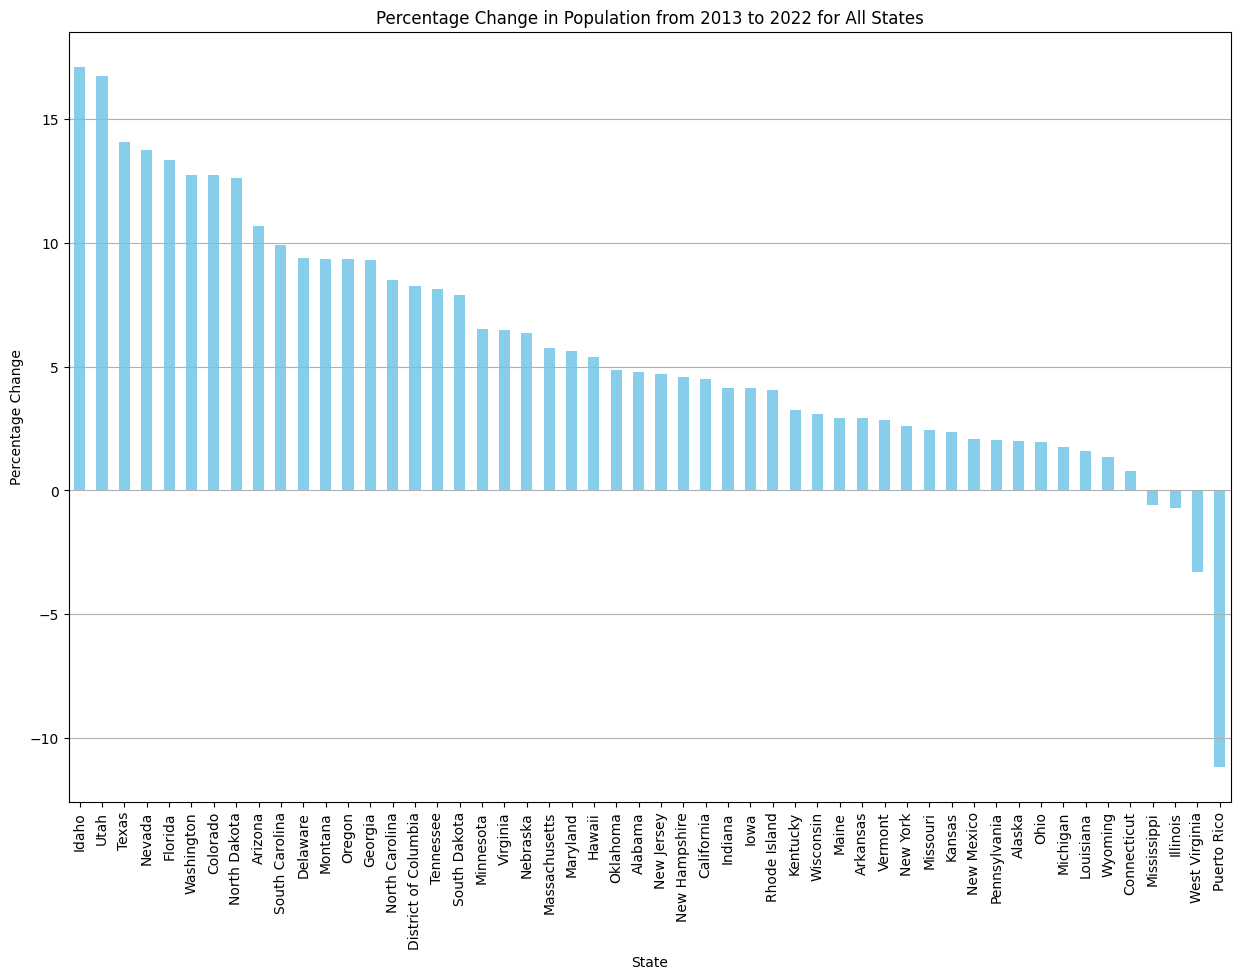

In [17]:
plt.figure(figsize=(15, 10))
percentage_change_sorted.plot(kind='bar', color='skyblue')
plt.title('Percentage Change in Population from 2013 to 2022 for All States')
plt.xlabel('State')
plt.ylabel('Percentage Change')
plt.xticks(rotation=90)
plt.grid(axis='y')

In [18]:
plt.show()

In [19]:
year_over_year_change = data.pct_change(axis=1) * 100
year_over_year_change = year_over_year_change.iloc[:, 1:]
average_annual_rate_of_change = year_over_year_change.mean(axis=1)
average_annual_rate_of_change_sorted = average_annual_rate_of_change.sort_values(ascending=False)

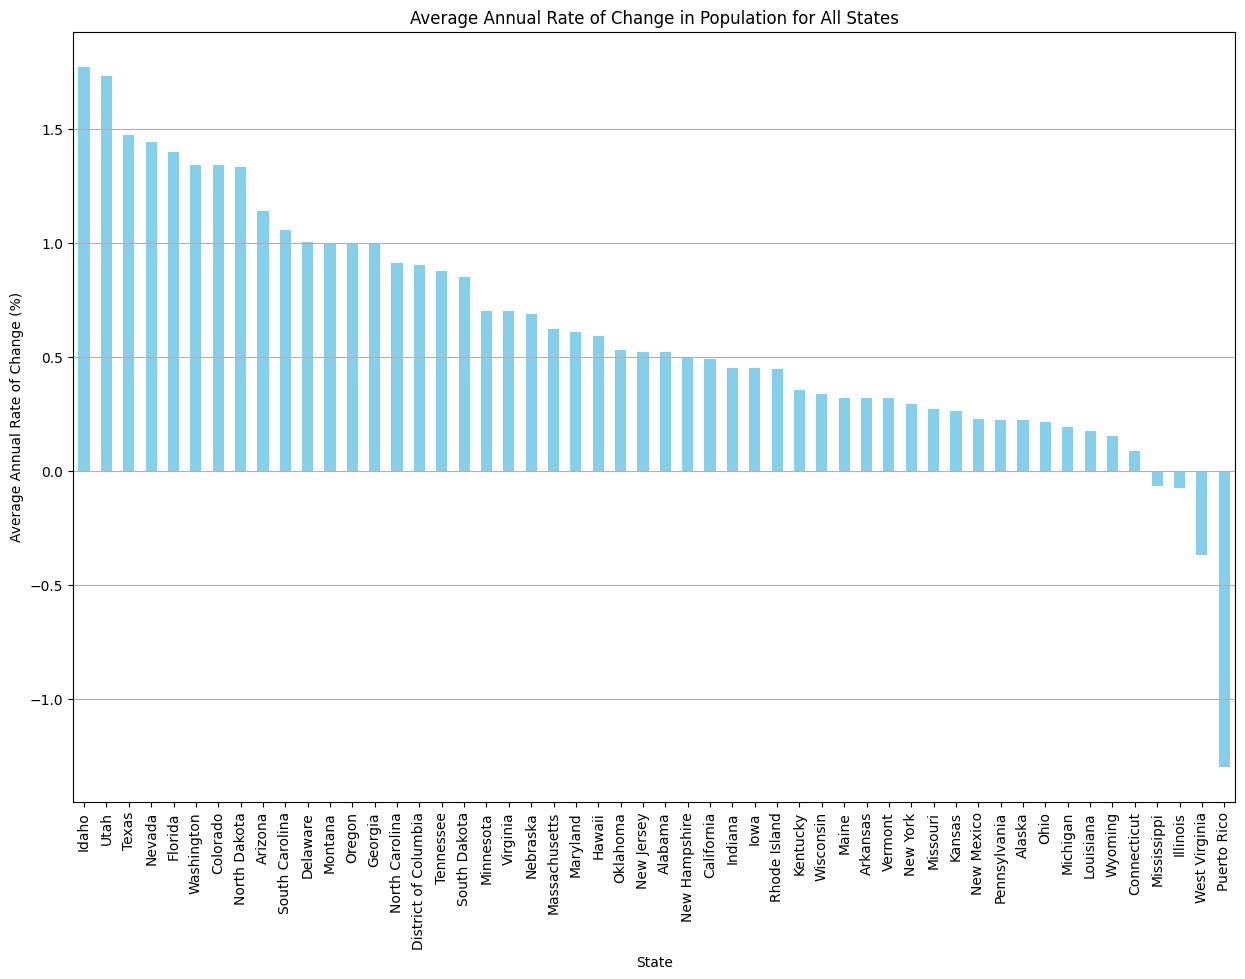

In [20]:
plt.figure(figsize=(15, 10))
average_annual_rate_of_change_sorted.plot(kind='bar', color='skyblue')
plt.title('Average Annual Rate of Change in Population for All States')
plt.xlabel('State')
plt.ylabel('Average Annual Rate of Change (%)')
plt.xticks(rotation=90)
plt.grid(axis='y')

In [21]:
plt.show()